# Customer Churn Prediction

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [112]:
df = pd.read_csv(r'D:\copy of htdocs\practice\Python\200days\Day174 Customer Churn Prediction\Churn_Modelling.csv')

In [113]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [115]:
df.duplicated().sum()

0

In [116]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [117]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [118]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [119]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [120]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [121]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [122]:
from sklearn.model_selection import train_test_split


In [123]:
X=df.drop(columns=['Exited'])
y = df['Exited']


In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [125]:
X_train.shape

(8000, 11)

In [126]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [127]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [128]:
from sklearn.preprocessing import StandardScaler


In [129]:
scalar = StandardScaler()

In [130]:
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [131]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [132]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import Dense

In [133]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [134]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [135]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100


200/200 [==============================] - 1s 2ms/step - loss: 0.5122 - accuracy: 0.7891 - val_loss: 0.4712 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4501 - accuracy: 0.7997 - val_loss: 0.4477 - val_accuracy: 0.8106
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8102 - val_loss: 0.4360 - val_accuracy: 0.8150
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4227 - accuracy: 0.8197 - val_loss: 0.4293 - val_accuracy: 0.8131
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8236 - val_loss: 0.4218 - val_accuracy: 0.8213
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8259 - val_loss: 0.4167 - val_accuracy: 0.8169
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4040 - accuracy: 0.8305 - val_loss: 0.4068 - val_accuracy: 0.8263
Epoch 8/100

In [136]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 11)                132       
                                                                 
 dense_13 (Dense)            (None, 11)                132       
                                                                 
 dense_14 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [137]:
model.layers[0].get_weights()

[array([[-0.14367571, -0.21553911, -0.19409063, -0.06343786, -0.05810913,
          0.1289414 , -0.05701622, -0.2569158 ,  0.07035409,  0.0095035 ,
          0.1123928 ],
        [ 0.38470912,  0.41166225, -0.12740713,  0.10108696, -0.0193508 ,
         -0.8930174 , -0.43379962, -0.4909418 ,  0.4924248 , -0.84956086,
         -0.43668607],
        [ 0.53881866,  0.00518824, -0.3545246 ,  0.2463989 , -0.04976446,
         -0.12551357,  0.6230032 ,  0.15478681, -0.16837604, -0.19274285,
         -0.128203  ],
        [-0.4624206 ,  0.22569153,  0.67921346, -0.23201789, -0.15548581,
         -0.0581262 , -0.92868924,  0.08659283,  0.03932319,  0.06663828,
         -0.94566053],
        [-0.05583392,  0.14358234,  0.89818406,  0.97990024, -1.3305429 ,
         -0.06323558, -0.23723122,  0.14537337,  0.1280025 , -0.06296656,
         -0.69213325],
        [-0.51745385,  0.43138766,  0.25285742,  0.08982383,  0.03721737,
         -0.10202692,  0.5793738 ,  0.54379123,  0.1904656 , -0.1027986

In [138]:
model.layers[1].get_weights()

[array([[-0.13740711,  0.13286489, -0.5302648 ,  0.29661208,  0.20423853,
          0.47412717,  0.28962535, -0.15338741,  0.12248418,  0.02999153,
         -0.30418405],
        [-0.2517556 ,  0.5475593 , -0.13288885, -0.07681964, -0.12771662,
          0.02934184,  0.7101669 , -0.11842299,  0.63901514, -0.09813866,
         -0.38045135],
        [-0.65256643, -0.02549191, -0.5006552 , -0.32366872,  0.64416116,
         -0.01381788, -0.09545089,  0.42249182, -0.19799358, -0.6103202 ,
          0.00431839],
        [ 0.2263646 , -0.4398447 , -0.26712325, -0.1126551 ,  0.74728024,
         -0.36043295, -0.55864894, -0.3362043 , -0.32072386, -1.0051647 ,
         -0.04426285],
        [-0.50457203, -0.28420147, -0.3732327 , -0.36565918,  1.0720953 ,
          0.00423546, -0.18189746,  0.03555064, -0.537548  ,  0.07434262,
          0.6172677 ],
        [ 0.03518955,  0.5052255 ,  0.5202502 ,  0.46093112, -1.0550798 ,
          0.36169282,  0.43160784, -0.5280536 , -0.47221494, -0.2613977

In [139]:
model.layers[2].get_weights()

[array([[-0.23199418],
        [-0.4760811 ],
        [-0.3533312 ],
        [-0.9147184 ],
        [ 1.4555941 ],
        [-0.17162795],
        [-0.6999837 ],
        [-0.45068145],
        [-0.58203596],
        [ 1.3716046 ],
        [ 0.8350327 ]], dtype=float32),
 array([0.01805362], dtype=float32)]

In [140]:
y_log = model.predict(X_test_scaled)


63/63 [==============================] - 0s 742us/step


In [141]:
y_pred=np.where(y_log>0.5,1,0)

In [142]:
from sklearn.metrics import accuracy_score

In [143]:
accuracy_score(y_test,y_pred)

0.865

In [144]:
history.history

{'loss': [0.5122102499008179,
  0.4501447379589081,
  0.4309966564178467,
  0.422659695148468,
  0.41672220826148987,
  0.4105486273765564,
  0.4040343761444092,
  0.39717957377433777,
  0.389058381319046,
  0.38054659962654114,
  0.37283721566200256,
  0.3656555116176605,
  0.36015743017196655,
  0.3555033802986145,
  0.3523780107498169,
  0.34948235750198364,
  0.34654873609542847,
  0.3460752069950104,
  0.34378138184547424,
  0.34176474809646606,
  0.34094083309173584,
  0.3400537967681885,
  0.33890917897224426,
  0.33876073360443115,
  0.3376837968826294,
  0.33728164434432983,
  0.33629095554351807,
  0.3355485498905182,
  0.3358429968357086,
  0.3354150354862213,
  0.33470723032951355,
  0.3340309262275696,
  0.33388710021972656,
  0.33306312561035156,
  0.33322447538375854,
  0.3321754038333893,
  0.3323286771774292,
  0.33124446868896484,
  0.33138734102249146,
  0.33149024844169617,
  0.3314051926136017,
  0.33080166578292847,
  0.33018890023231506,
  0.3308990001678467,
  0

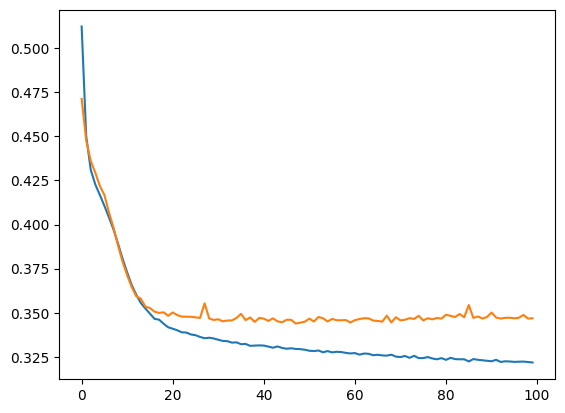

In [145]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


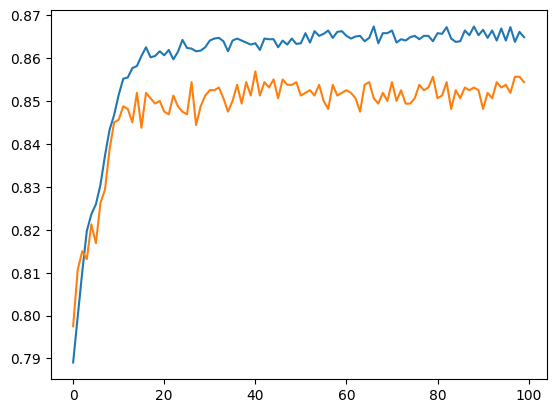

In [146]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
